# Importing Packages

In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


from turtle import color
from matplotlib.lines import lineStyles 

# Change Directory 

In [1]:
!git clone https://github.com/rhfo3218/LG_ML_tutorial.git
import os
os.chdir('/content/LG_ML_tutorial/8. Example_1_Concrete')

Cloning into 'LG_ML_tutorial'...


FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: '/content/LG_ML_tutorial/8. Example_1_Concrete'

# Concrete dataset

Data from https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength

1,030 observations

+ predictors (quantitative, numeric)
   + Cement (component 1) -- kg in a m3 mixture 
   + Blast Furnace Slag (component 2) -- kg in a m3 mixture 
   + Fly Ash (component 3) -- kg in a m3 mixture
   + Water (component 4) -- kg in a m3 mixture
   + Superplasticizer (component 5) -- kg in a m3 mixture  
   + Coarse Aggregate (component 6) -- kg in a m3 mixture 
   + Fine Aggregate (component 7) -- kg in a m3 mixture 
   + Age -- Day (1~365)

+ response
   + Concrete compressive strength


## The problem we have to solve with this real dataset is like below.

You would like to learn a model which can predict Concrete Compressive strength well.

Concrete Compressive strength depends on the ratio of Components in the mixture and age(elapsed time).  

But dataset has been polluted.

dataset contains some outliers, unnecessary, currupted data.




**(Question) How can we learn best models with this dataset?**

In [4]:
# load data
concrete = pd.read_csv('Concrete.csv')
dataset = np.array(concrete)


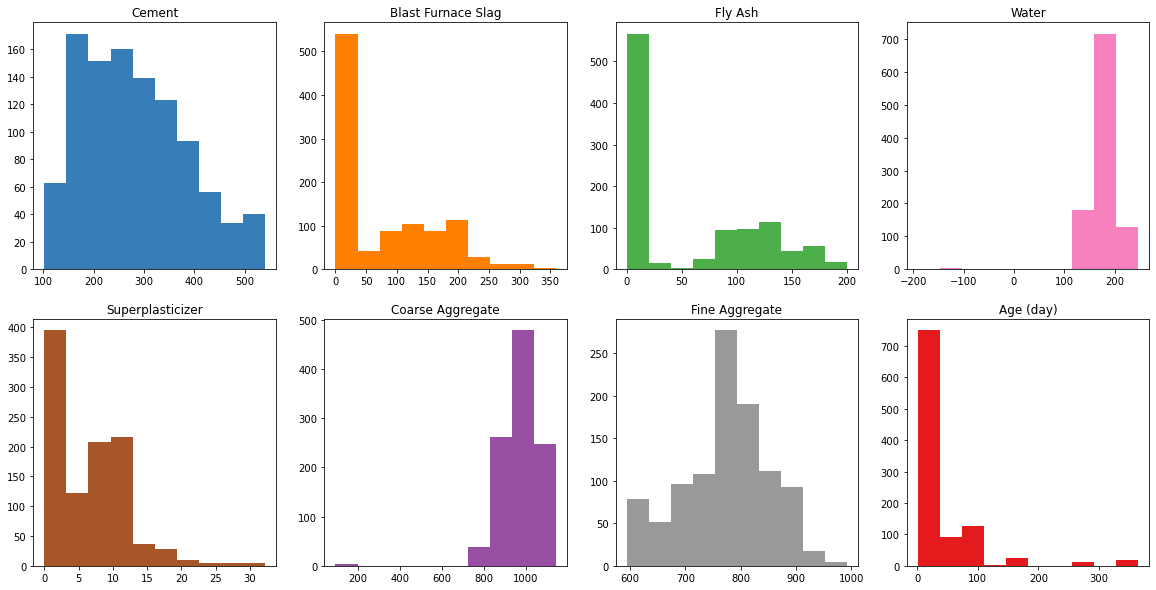

In [5]:
# histogram analysis
from matplotlib.pyplot import subplot
columns = ['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate', 'Age (day)']
colors = np.array(list(['#377eb8', '#ff7f00', '#4daf4a',
                                    '#f781bf', '#a65628', '#984ea3',
                                    '#999999', '#e41a1c', '#dede00']))
                                    
plt.figure(figsize=(20,10))
for i in range(8):
    subplot(2,4,i+1)
    plt.hist(dataset[:,i], color= colors[i])
    plt.title(columns[i])
plt.show()


In [6]:
# min-max normalize
scaler = MinMaxScaler()
scaler.fit(dataset)

maxs = scaler.data_max_
mins = scaler.data_min_

dataset = scaler.transform(dataset)
data_X = dataset[:,0:8]
data_y = dataset[:,8]


In [7]:
# train-test split
n_train = round(0.7*data_X.shape[0])
tr_X, ts_X, tr_Y, ts_Y = train_test_split(data_X, data_y, train_size=n_train)

# Linear Regression

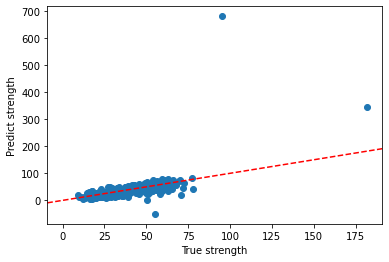

mse =  1361.926
mae =  11.502
R-squared =  -3.484


In [8]:
# fitting
lr_model = LinearRegression()
lr_model.fit(tr_X,tr_Y)
pred = lr_model.predict(ts_X)

# re-scaling
true_y = ts_Y*(maxs[8]- mins[8]) + mins[8]
pred_y = pred*(maxs[8]- mins[8]) + mins[8]

# scatter plot
plt.scatter(pred_y,true_y)
plt.axline((0,0),(0.5,0.5), ls = '--', color = 'r')
plt.xlabel('True strength')
plt.ylabel('Predict strength')
plt.show()

# measure
mse = mean_squared_error(pred_y,true_y)
mae = mean_absolute_error(pred_y,true_y)
r2 = r2_score(pred_y,true_y)

print('mse = ', np.round(mse,3))
print('mae = ', np.round(mae,3))
print('R-squared = ',np.round(r2,3))



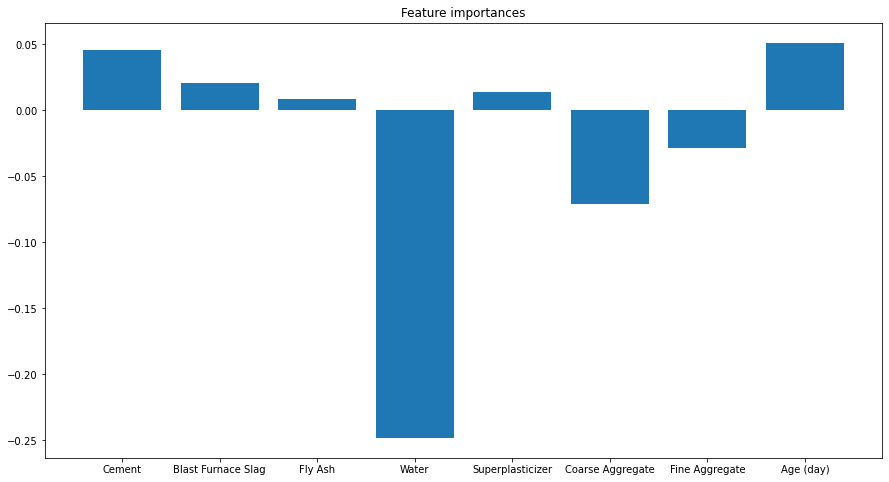

In [9]:
# Coefficient( Feature importances )
plt.figure(figsize=(15,8))
plt.bar(['Cement',
       'Blast Furnace Slag',
       'Fly Ash',
       'Water',
       'Superplasticizer',
       'Coarse Aggregate',
       'Fine Aggregate', 
       'Age (day)'],lr_model.coef_)
plt.title('Feature importances')       
plt.show()

# Data Cleansing

In [11]:
dataset_cleaned = np.array(concrete).copy()

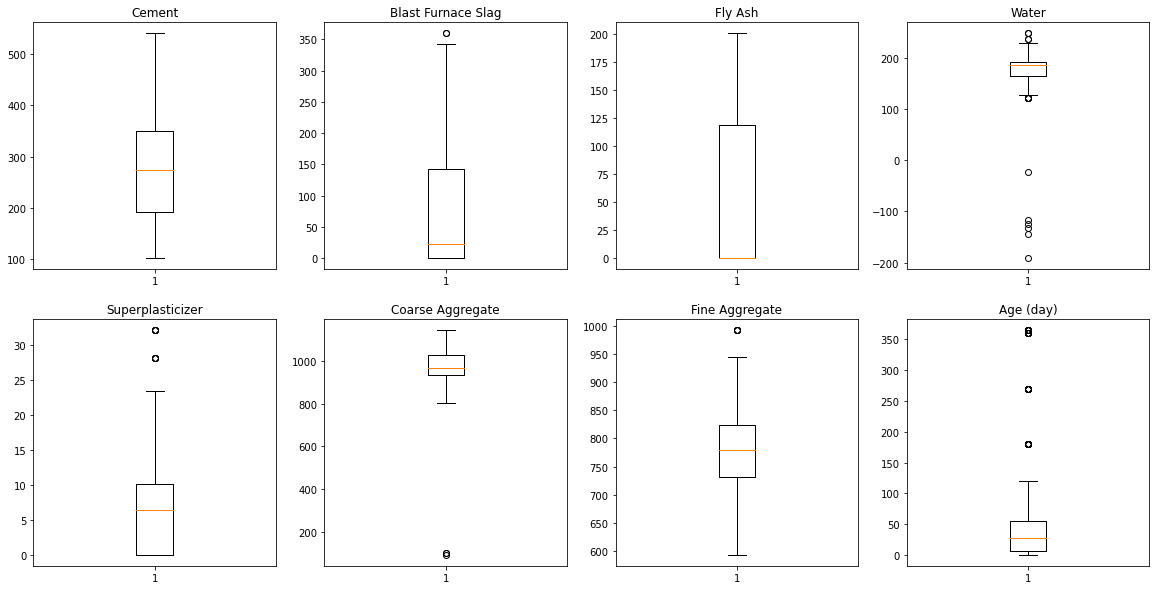

In [12]:
# Boxplot analysis_X
from matplotlib.pyplot import subplot
columns = ['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate', 'Age (day)']
                            
plt.figure(figsize=(20,10))
for i in range(8):
    subplot(2,4,i+1)
    plt.boxplot(dataset_cleaned[:,i])
    plt.title(columns[i])
plt.show()

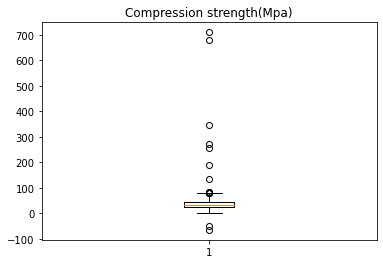

In [13]:
# Boxplot analysis_y
plt.boxplot(dataset_cleaned[:,8])
plt.title('Compression strength(Mpa)')
plt.show()

### Ranges of components of data sets
![ranges](./fig2.png)

In [37]:
# delete water is under 0
dataset_cleaned = np.delete(dataset_cleaned, np.where(dataset_cleaned[:,3] < 0), axis = 0)

# delete Coarse aggregate is under 200
dataset_cleaned = np.delete(dataset_cleaned, np.where(dataset_cleaned[:,5] <= 200), axis = 0)

# delete Compression strength is under 0, or upper 120
dataset_cleaned = np.delete(dataset_cleaned, np.where(dataset_cleaned[:,8] >= 100), axis = 0)
dataset_cleaned = np.delete(dataset_cleaned, np.where(dataset_cleaned[:,8] < 0), axis = 0)

In [15]:
dataset = dataset_cleaned

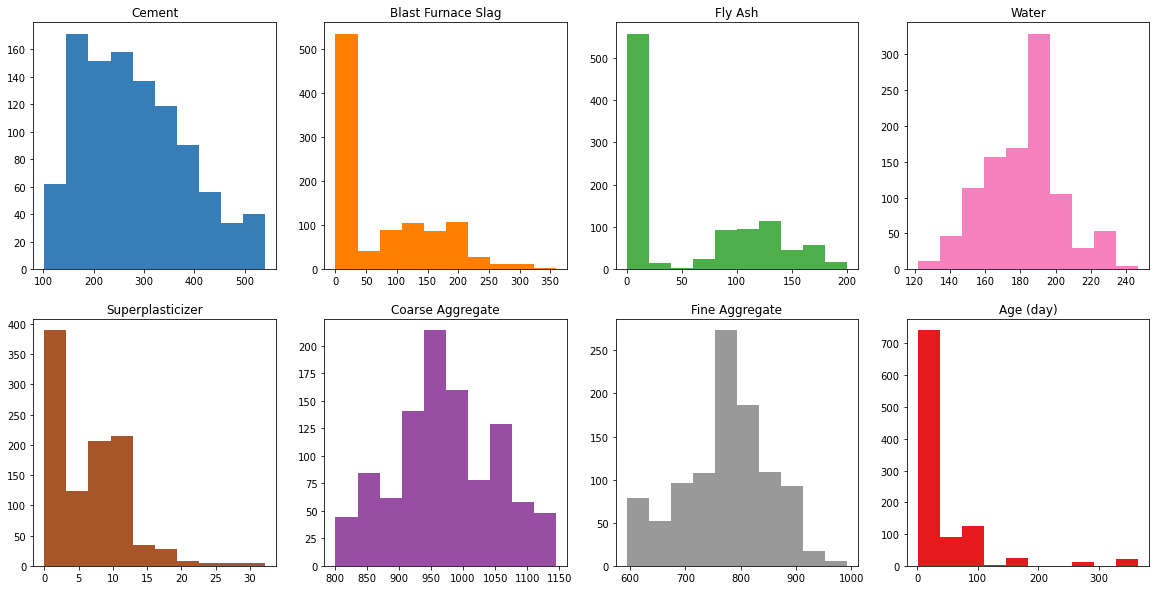

In [16]:
# histogram analysis
from matplotlib.pyplot import subplot
columns = ['Cement','Blast Furnace Slag','Fly Ash','Water','Superplasticizer','Coarse Aggregate','Fine Aggregate', 'Age (day)']
colors = np.array(list(['#377eb8', '#ff7f00', '#4daf4a',
                                    '#f781bf', '#a65628', '#984ea3',
                                    '#999999', '#e41a1c', '#dede00']))
                                    
plt.figure(figsize=(20,10))
for i in range(8):
    subplot(2,4,i+1)
    plt.hist(dataset[:,i], color= colors[i])
    plt.title(columns[i])
plt.show()

In [17]:
# min-max normalize
scaler = MinMaxScaler()
scaler.fit(dataset)

maxs = scaler.data_max_
mins = scaler.data_min_

dataset = scaler.transform(dataset)
data_X = dataset[:,0:8]
data_y = dataset[:,8]
# train-test split
n_train = round(0.7*data_X.shape[0])
tr_X, ts_X, tr_Y, ts_Y = train_test_split(data_X, data_y, train_size=n_train)

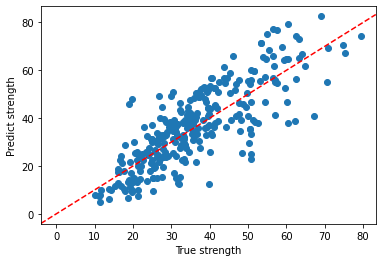

mse =  93.407
mae =  7.717
R-squared =  0.487


In [18]:
# fitting
lr_model = LinearRegression()
lr_model.fit(tr_X,tr_Y)
pred = lr_model.predict(ts_X)

# re-scaling
true_y = ts_Y*(maxs[8]- mins[8]) + mins[8]
pred_y = pred*(maxs[8]- mins[8]) + mins[8]

# scatter plot
plt.scatter(pred_y,true_y)
plt.axline((0,0),(0.5,0.5), ls = '--', color = 'r')
plt.xlabel('True strength')
plt.ylabel('Predict strength')
plt.show()

# measure
mse = mean_squared_error(pred_y,true_y)
mae = mean_absolute_error(pred_y,true_y)
r2 = r2_score(pred_y,true_y)

print('mse = ', np.round(mse,3))
print('mae = ', np.round(mae,3))
print('R-squared = ',np.round(r2,3))


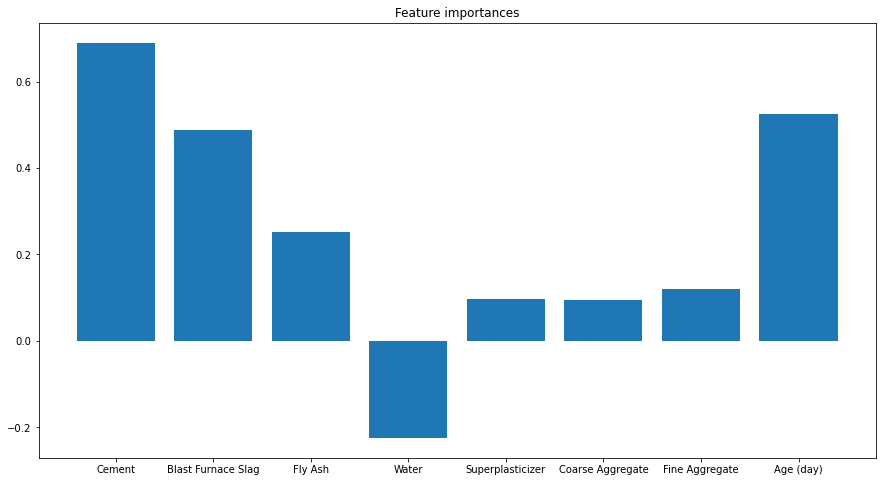

In [19]:
# Coefficient( Feature importances )
plt.figure(figsize=(15,8))
plt.bar(['Cement',
       'Blast Furnace Slag',
       'Fly Ash',
       'Water',
       'Superplasticizer',
       'Coarse Aggregate',
       'Fine Aggregate', 
       'Age (day)'],lr_model.coef_)
plt.title('Feature importances')       
plt.show()

# Add Domain Knowledges
![age](./fig1.png)
 ## w/b = water and binder ratio

In [23]:
dataset2 = dataset.copy()
age = dataset2[:,7]*(maxs[7] - mins[7]) + mins[7] 

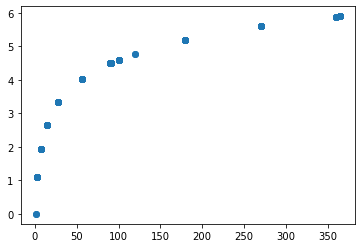

In [25]:
plt.scatter(age,np.log(age))
plt.show()

In [26]:
age = np.log(age)
age = (age - np.min(age)) / (np.max(age) - np.min(age))
age

array([0.56479025, 0.56479025, 0.94890159, ..., 0.56479025, 0.56479025,
       0.56479025])

In [27]:
dataset2[:,7] = age

In [28]:
dataset2

array([[1.        , 0.        , 0.        , ..., 0.20572002, 0.56479025,
        0.96703918],
       [1.        , 0.        , 0.        , ..., 0.20572002, 0.56479025,
        0.73874853],
       [0.52625571, 0.39649416, 0.        , ..., 0.        , 0.94890159,
        0.46606949],
       ...,
       [0.10616438, 0.38786867, 0.54272864, ..., 0.46663322, 0.56479025,
        0.25702483],
       [0.1303653 , 0.51947691, 0.        , ..., 0.48896136, 0.56479025,
        0.37144845],
       [0.36278539, 0.27963272, 0.39130435, ..., 0.42022077, 0.56479025,
        0.36682176]])

In [29]:
data_X = dataset2[:,0:8]
data_y = dataset2[:,8]
# train-test split
n_train = round(0.7*data_X.shape[0])
tr_X, ts_X, tr_Y, ts_Y = train_test_split(data_X, data_y, train_size=n_train)

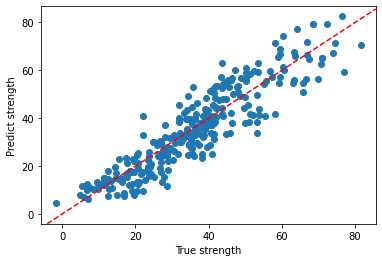

mse =  50.041
mae =  5.602
R-squared =  0.801


In [30]:
# fitting
lr_model = LinearRegression()
lr_model.fit(tr_X,tr_Y)
pred = lr_model.predict(ts_X)

# re-scaling
true_y = ts_Y*(maxs[8]- mins[8]) + mins[8]
pred_y = pred*(maxs[8]- mins[8]) + mins[8]

# scatter plot
plt.scatter(pred_y,true_y)
plt.axline((0,0),(0.5,0.5), ls = '--', color = 'r')
plt.xlabel('True strength')
plt.ylabel('Predict strength')
plt.show()

# measure
mse = mean_squared_error(pred_y,true_y)
mae = mean_absolute_error(pred_y,true_y)
r2 = r2_score(pred_y,true_y)

print('mse = ', np.round(mse,3))
print('mae = ', np.round(mae,3))
print('R-squared = ',np.round(r2,3))


# Importing packages
## for other ensemble machine and neural network models

In [31]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor

In [33]:
# train-test split
n_train = round(0.7*data_X.shape[0])
tr_X, ts_X, tr_Y, ts_Y = train_test_split(data_X, data_y, train_size=n_train)

# AdaBoost

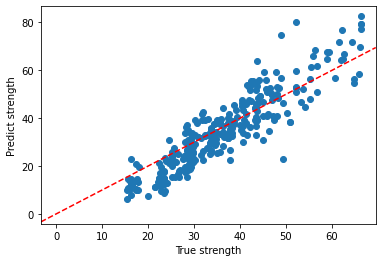

mse =  53.172
mae =  5.824
R-squared =  0.613


In [34]:
# fitting
ADB_model = AdaBoostRegressor(n_estimators= 100)
ADB_model.fit(tr_X,tr_Y)
pred = ADB_model.predict(ts_X)

# re-scaling
true_y = ts_Y*(maxs[8]- mins[8]) + mins[8]
pred_y = pred*(maxs[8]- mins[8]) + mins[8]

# scatter plot
plt.scatter(pred_y,true_y)
plt.axline((0,0),(0.5,0.5), ls = '--', color = 'r')
plt.xlabel('True strength')
plt.ylabel('Predict strength')
plt.show()

# measure
mse = mean_squared_error(pred_y,true_y)
mae = mean_absolute_error(pred_y,true_y)
r2 = r2_score(pred_y,true_y)

print('mse = ', np.round(mse,3))
print('mae = ', np.round(mae,3))
print('R-squared = ',np.round(r2,3))




# Gradient Boost

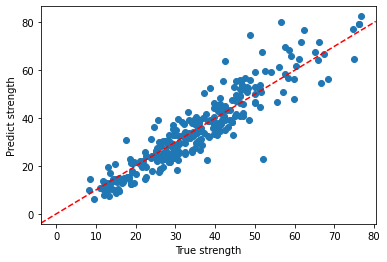

mse =  35.525
mae =  4.41
R-squared =  0.818


In [35]:
# fitting
GBM_model = GradientBoostingRegressor(n_estimators= 50)
GBM_model.fit(tr_X,tr_Y)
pred = GBM_model.predict(ts_X)

# re-scaling
true_y = ts_Y*(maxs[8]- mins[8]) + mins[8]
pred_y = pred*(maxs[8]- mins[8]) + mins[8]

# scatter plot
plt.scatter(pred_y,true_y)
plt.axline((0,0),(0.5,0.5), ls = '--', color = 'r')
plt.xlabel('True strength')
plt.ylabel('Predict strength')
plt.show()

# measure
mse = mean_squared_error(pred_y,true_y)
mae = mean_absolute_error(pred_y,true_y)
r2 = r2_score(pred_y,true_y)

print('mse = ', np.round(mse,3))
print('mae = ', np.round(mae,3))
print('R-squared = ',np.round(r2,3))


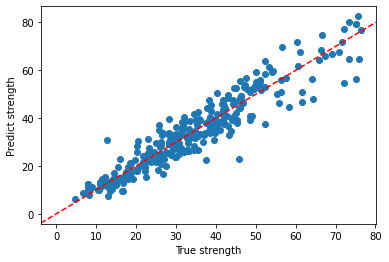

mse =  29.537
mae =  4.077
R-squared =  0.879


In [36]:
# fitting
NN_model = MLPRegressor(solver = 'lbfgs', batch_size= 300, max_iter=20000, alpha=1e-2, hidden_layer_sizes=(10,8,))
NN_model.fit(tr_X,tr_Y)
pred = NN_model.predict(ts_X)

# re-scaling
true_y = ts_Y*(maxs[8]- mins[8]) + mins[8]
pred_y = pred*(maxs[8]- mins[8]) + mins[8]

# scatter plot
plt.scatter(pred_y,true_y)
plt.axline((0,0),(0.5,0.5), ls = '--', color = 'r')
plt.xlabel('True strength')
plt.ylabel('Predict strength')
plt.show()

# measure
mse = mean_squared_error(pred_y,true_y)
mae = mean_absolute_error(pred_y,true_y)
r2 = r2_score(pred_y,true_y)

print('mse = ', np.round(mse,3))
print('mae = ', np.round(mae,3))
print('R-squared = ',np.round(r2,3))


**(Question) which model is best ?**